In [135]:
import pandas as pd
import numpy as np
train  = pd.read_csv(r"./train.csv")
test = pd.read_csv(r"./test.csv")

#### Your task is to predict the selling price of the products based on the provided features. 

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [137]:
# Vamos a separar la fecha para ver si influye en algo
# For train data
train['instock_date']= pd.to_datetime(train['instock_date'])
train['year'] = train['instock_date'].dt.year
train['month'] =  train['instock_date'].dt.month
train['quarter'] = train['instock_date'].dt.quarter
train['day of the week'] = train['instock_date'].dt.dayofweek # Monday = 0 & Sunday = 6
train['Dayofyear'] = train['instock_date'].dt.dayofyear
train["hour"] = train['instock_date'].dt.hour

In [138]:
# For test data
test['instock_date']= pd.to_datetime(test['instock_date'])
test['year'] = test['instock_date'].dt.year
test['month'] =  test['instock_date'].dt.month
test['quarter'] = test['instock_date'].dt.quarter
test['day of the week'] = test['instock_date'].dt.dayofweek # Monday = 0 & Sunday = 6
test['Dayofyear'] = test['instock_date'].dt.dayofyear
test["hour"] = test['instock_date'].dt.hour

In [139]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,...,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Lillyann,Yes,Fashion,1,68,0.0,...,11.0,2983.0,4713.0,4185.947700,2015,8,3,5,234,18
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Klynn,Yes,Fashion,0,51,0.0,...,12.0,7495.0,10352.0,9271.490256,2016,3,1,6,87,21
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Ridge,Yes,Child_care,0,10,0.0,...,9.0,5752.0,7309.0,6785.701362,2015,8,3,1,230,19
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Abran,Yes,Educational,2,48,0.0,...,13.0,5090.0,20814.0,13028.917824,2016,3,1,0,88,21
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Dustyn,Yes,Repair,1,35,1.0,...,4.0,2430.0,9261.0,906.553935,2016,3,1,1,89,22


In [140]:
print("Cantidad de valores unicos:\n")
train.nunique()

Cantidad de valores unicos:



Product_id          6368
Stall_no              50
instock_date        5350
Market_Category      248
Customer_name       5900
Loyalty_customer       2
Product_Category      10
Grade                  4
Demand               100
Discount_avail         2
charges_1            487
charges_2 (%)         17
Minimum_price       4236
Maximum_price       4618
Selling_Price       6321
year                   3
month                 11
quarter                4
day of the week        7
Dayofyear            214
hour                  24
dtype: int64

In [141]:
nans = train.shape[0] - train.dropna().shape[0]
print ("%d filas tienen valores perdidos en train" %nans)

nand = test.shape[0] - test.dropna().shape[0]
print ("%d filas tienen valores perdidos en test" %nand)

971 filas tienen valores perdidos en train
106 filas tienen valores perdidos en test


In [142]:
print("Distribucion en Market_Category:\n")
def frequency_table(data, column):
    return pd.crosstab(index=data[column],columns="count").sort_values(by = "count", ascending = False)

freq_tab = frequency_table(train, "Market_Category")
freq_tab

Distribucion en Market_Category:



col_0,count
Market_Category,
23,326
452,323
358,271
55,249
3,239
...,...
239,1
248,1
255,1


The samples having unique categories would not contribute much


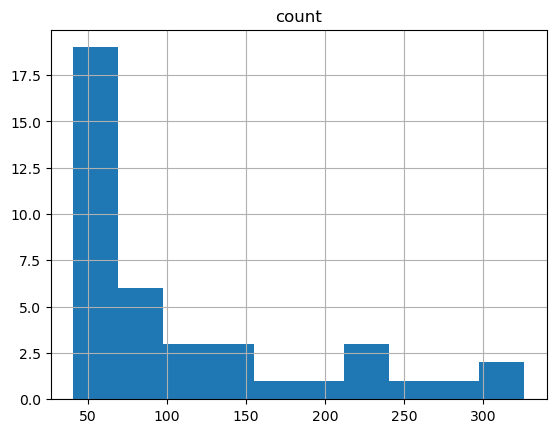

In [143]:

%matplotlib inline
freq_tab[freq_tab["count"] > 40].hist()
print("The samples having unique categories would not contribute much")

In [144]:
train = train[train['Selling_Price'].notna()]

In [145]:
# After applying Label Encoding to categorical columns: train['Customer_name'], train['Loyalty_customer'], train['Product_Category']

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Loyalty_customer'. 
train['Loyalty_customer']= label_encoder.fit_transform(train['Loyalty_customer']) 

# Encode labels in column 'Product_Category'. 
train['Product_Category']= label_encoder.fit_transform(train['Product_Category']) 

In [146]:
data_train = train.drop(['Product_id', 'instock_date','Customer_name', 'Loyalty_customer'], axis=1)

In [147]:
print("Este grafico es interesante porque muestra la correlacion de las variables, mientras mas cerca este del 1 mas se correlacionan, en este caso tenemos a Discount-SellingPrice, Maximun-Minimun-SellingPrice. Tambien se ve que el dia o fecha no tiene mucho impacto")
data_train.corr()

Este grafico es interesante porque muestra la correlacion de las variables, mientras mas cerca este del 1 mas se correlacionan, en este caso tenemos a Discount-SellingPrice, Maximun-Minimun-SellingPrice. Tambien se ve que el dia o fecha no tiene mucho impacto


,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour
Stall_no,1.000000,-0.005254,-0.011960,-0.005062,0.003070,-0.020269,-0.010733,-0.004029,-0.000394,0.007399,0.011733,0.014627,-0.014229,-0.015480,0.002647,-0.011432,-0.009066
Market_Category,-0.005254,1.000000,-0.001127,-0.035902,-0.018040,-0.002846,0.019139,0.024895,0.195888,0.134984,0.138711,-0.153107,0.088154,0.110823,0.068333,0.079718,-0.045177
Product_Category,-0.011960,-0.001127,1.000000,0.010497,-0.021591,-0.027269,0.209666,-0.477107,0.001426,-0.012091,0.015041,0.000758,0.002964,0.003907,-0.001374,0.003509,0.011836
Grade,-0.005062,-0.035902,0.010497,1.000000,0.010543,-0.026472,-0.024713,-0.016009,-0.077312,0.166191,0.086450,0.026093,-0.031502,-0.036849,-0.021352,-0.031204,0.031726
Demand,0.003070,-0.018040,-0.021591,0.010543,1.000000,0.008047,-0.008551,0.017853,0.009699,0.003915,-0.000601,-0.009099,0.013794,0.017692,0.010424,0.013055,-0.018795
Discount_avail,-0.020269,-0.002846,-0.027269,-0.026472,0.008047,1.000000,-0.004402,0.018980,0.011032,-0.003278,-0.512457,0.136271,-0.086498,-0.069562,-0.016370,-0.096114,-0.122093
charges_1,-0.010733,0.019139,0.209666,-0.024713,-0.008551,-0.004402,1.000000,0.270698,0.018247,0.011605,0.053045,-0.015504,0.012858,0.013501,-0.003653,0.012397,0.007970
charges_2 (%),-0.004029,0.024895,-0.477107,-0.016009,0.017853,0.018980,0.270698,1.000000,0.006103,0.010472,0.009031,-0.001882,-0.005513,-0.003757,-0.001500,-0.006752,-0.008302
Minimum_price,-0.000394,0.195888,0.001426,-0.077312,0.009699,0.011032,0.018247,0.006103,1.000000,0.707679,0.700444,0.056632,-0.013011,-0.010205,0.005408,-0.012291,-0.054918
Maximum_price,0.007399,0.134984,-0.012091,0.166191,0.003915,-0.003278,0.011605,0.010472,0.707679,1.000000,0.766928,0.179297,-0.112616,-0.128620,-0.066737,-0.104311,0.001049


In [150]:
#data_train["Selling_Price"] = data_train["Selling_Price"].abs()
data_train = data_train.drop(['year','month','quarter','day of the week','Dayofyear','hour'], axis=1)
data_train["Selling_Price"] = data_train["Selling_Price"].abs()

In [151]:
data_train.isna().sum()

Stall_no              5
Market_Category       0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
dtype: int64

In [152]:
data_train=data_train.dropna()

In [153]:
data_train.Selling_Price.describe()

count     5570.000000
mean      4586.281243
std       2992.165421
min          4.000000
25%       2419.777877
50%       4227.362960
75%       6213.924011
max      22638.325941
Name: Selling_Price, dtype: float64

In [154]:
data_train.isna().sum()

Stall_no            0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

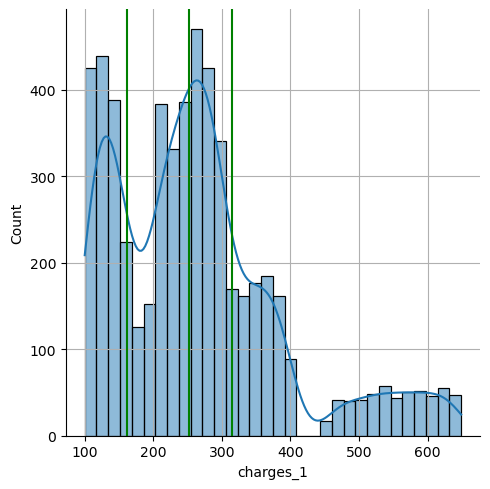

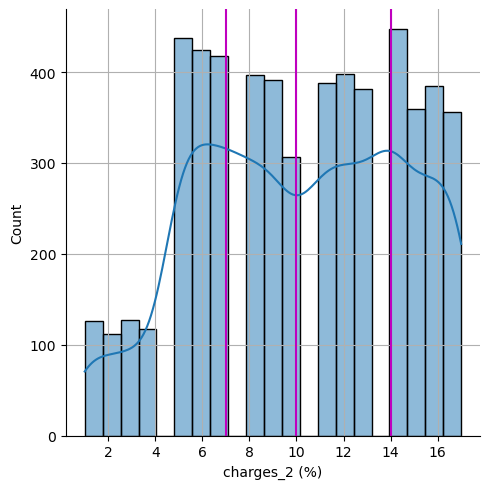

In [155]:
# Distplot of Charges_1
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data_train.charges_1,kde=True)
plt.grid('True')
for x in [0.25,0.5,0.75]:
    plt.axvline(data_train.charges_1.quantile(x),c='g',lw=1.5)
plt.show()

sns.displot(data_train['charges_2 (%)'],kde=True)
plt.grid('True')
for x in [0.25,0.50,0.75]:
    plt.axvline(data_train['charges_2 (%)'].quantile(x),color='m',lw=1.5)
plt.show()

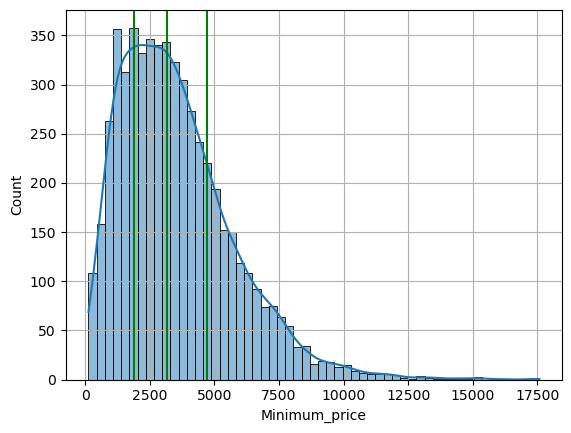

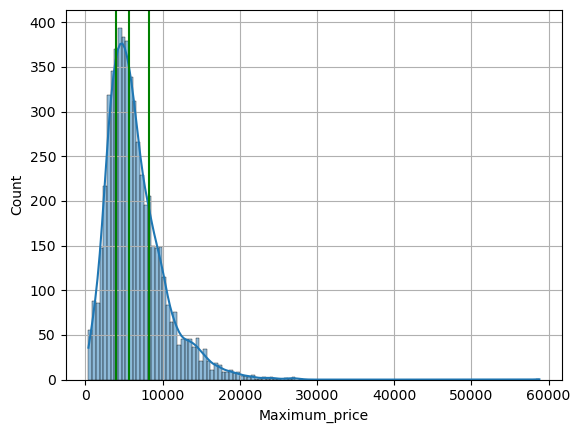

In [156]:
# Distplot of Minimum Price
sns.histplot(data=data_train.Minimum_price, kde=True)
plt.grid('True')
for x in [0.25,0.50,0.75]:
    plt.axvline(data_train.Minimum_price.quantile(x),c='g',lw=1.5)
plt.show()
# Distplot of Maximum Price
sns.histplot(data=data_train.Maximum_price, kde=True)
plt.grid('True')
for x in [0.25,0.50,0.75]:
    plt.axvline(data_train.Maximum_price.quantile(x),c='g',lw=1.5)
plt.show()

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
X = data_train.drop(['Selling_Price'], axis=1)
Y = data_train['Selling_Price']


In [160]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [161]:
print("Intercept:", model.intercept_)

lr_coefficients = list(zip(data_train.loc[:, data_train.columns != 'Selling_Price'].columns,model.coef_))
print("\nNumber of coefficients:",len(lr_coefficients))
print("\nFeature coefficients:",*lr_coefficients, sep='\n')

Intercept: 666.652740414389

Number of coefficients: 10

Feature coefficients:
('Stall_no', -0.7245058437170878)
('Market_Category', 0.05305956945632214)
('Product_Category', -1.119417954473378)
('Grade', 25.944927188935782)
('Demand', -0.3555181799709614)
('Discount_avail', -4452.081783032694)
('charges_1', 0.998486837832368)
('charges_2 (%)', -0.31583132086896054)
('Minimum_price', 0.44297714859975607)
('Maximum_price', 0.4251817459008408)


In [162]:
# After applying Label Encoding to categorical columns: train['Customer_name'], train['Loyalty_customer'], train['Product_Category']

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Loyalty_customer'. 
test['Loyalty_customer']= label_encoder.fit_transform(test['Loyalty_customer']) 

# Encode labels in column 'Product_Category'. 
test['Product_Category']= label_encoder.fit_transform(test['Product_Category']) 

In [163]:
data_test = test.drop(['Product_id', 'instock_date','Customer_name', 'Loyalty_customer'], axis=1)

data_test=data_test.drop(['year','month','quarter','day of the week','Dayofyear','hour'], axis=1)

In [164]:
data_test=data_test.dropna()
data_test.isnull().sum()

Stall_no            0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
dtype: int64

In [165]:
pred = model.predict(data_test)

In [172]:
pred = abs(pred)

In [173]:
pred.shape

(3374,)

## Scores
En estadística, el *error cuadrático medio* de un estimador mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima.
There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.

*Error logarítmico cuadrático medio*, se puede interpretar como el radio entre los valores verdaderos y los valores pronósticados. Se usa esta métrica cuando se desea que los errores grandes sean más penalizados que los errores pequeños.

In [168]:
from sklearn.metrics import mean_absolute_error
import numpy as np
lr_predicted_train=abs(model.predict(X))
rmse1 = np.sqrt(mean_absolute_error(Y, lr_predicted_train))
print("train_rmse =", rmse1)

train_rmse = 20.17864295666664


In [169]:
from sklearn.metrics import mean_squared_log_error

RMSLE = np.sqrt(mean_squared_log_error(Y,lr_predicted_train))
score1 = max(0,100 - RMSLE)
print("train_score =", score1)

train_score = 99.51122087681566


## Ridge Regression
La regresión de cresta es un método para estimar los coeficientes de modelos de regresión múltiple en escenarios donde las variables independientes están altamente correlacionadas.

In [96]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_error
lambdas=np.linspace(0.1,10,100)
params={'alpha':lambdas}

model=Ridge(fit_intercept=True)
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(X, Y)
model = grid_search.best_estimator_

rg_predicted_train = abs(model.predict(X))

In [97]:
ridge_coefficients = list(zip(data_train.loc[:, data_train.columns != 'Selling_Price'].columns,model.coef_))
print("\nNumber of coefficients:",len(ridge_coefficients))
print("\nFeature coefficients:",*ridge_coefficients, sep='\n')


Number of coefficients: 10

Feature coefficients:
('Stall_no', -0.7084757928990327)
('Market_Category', 0.060425907796309276)
('Product_Category', -0.47429608225549463)
('Grade', 26.013142580522995)
('Demand', -0.3347909560291399)
('Discount_avail', -4390.099389883514)
('charges_1', 0.9902090925259653)
('charges_2 (%)', -0.12353464917681863)
('Minimum_price', 0.442972193802634)
('Maximum_price', 0.4250449147645299)


In [98]:
rmse1 = np.sqrt(mean_absolute_error(Y, rg_predicted_train))
print("train_rmse =", rmse1)

train_rmse = 20.172646865904646


In [99]:
RMSLE = np.sqrt(mean_squared_log_error(Y,rg_predicted_train))
score1 = max(0,100 - RMSLE)
print("train_score =", score1)

train_score = 99.51701804215182


## Predict

In [102]:
pred = model.predict(data_test)

NameError: name 'unique' is not defined